In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

from plotly.offline import plot, iplot
#plotly.plotly.iplot()
import cufflinks as cf
import chartify


In [2]:
# setting our data
data = pd.read_csv('data/2020/english_premier_league.csv')
data.head(20)


club_name              player_name  age            position  \
0    Arsenal FC                   Thomas   27  Defensive Midfield   
1    Arsenal FC                  Gabriel   22         Centre-Back   
2    Arsenal FC               Pablo Marí   26         Centre-Back   
3    Arsenal FC     Rúnar Alex Rúnarsson   25          Goalkeeper   
4    Arsenal FC            Cédric Soares   28          Right-Back   
5    Arsenal FC                  Willian   32        Right Winger   
6    Arsenal FC         Emile Smith Rowe   20  Attacking Midfield   
7    Arsenal FC           William Saliba   19         Centre-Back   
8    Arsenal FC           Mohamed Elneny   28  Defensive Midfield   
9    Arsenal FC       Henrikh Mkhitaryan   31  Attacking Midfield   
10   Arsenal FC              Dejan Iliev   25          Goalkeeper   
11   Arsenal FC        Emiliano Martínez   28          Goalkeeper   
12   Arsenal FC         Mattéo Guendouzi   21    Central Midfield   
13   Arsenal FC  Konstantinos Mavropanos   22         Centre-Back   
14   Arsenal FC       Henrikh Mkhitaryan   31  Attacking Midfield   
15   Arsenal FC           Lucas Torreira   24  Defensive Midfield   
16   Arsenal FC              Dejan Iliev   25          Goalkeeper   
17   Arsenal FC               Pablo Marí   26         Centre-Back   
18   Arsenal FC            Cédric Soares   28          Right-Back   
19  Aston Villa            Ollie Watkins   24      Centre-Forward   

           league_involved club_involved_name                      fee  \
0          Spanish La Liga    Atlético Madrid                  £45.00m   
1           French Ligue 1         LOSC Lille                  £23.40m   
2        Brasilian Serie A           Flamengo                   £7.20m   
3           French Ligue 1              Dijon                   £1.80m   
4   English Premier League        Southampton            Free transfer   
5   English Premier League            Chelsea            Free transfer   
6         Development Team        Arsenal U23                        -   
7           French Ligue 1      Saint-Étienne  End of loanJun 30, 2020   
8        Turkish Super Lig           Besiktas   End of loanAug 3, 2020   
9          Italian Serie A            AS Roma  End of loanAug 31, 2020   
10      Polish Ekstraklasa        Jagiellonia  End of loanJul 31, 2020   
11  English Premier League        Aston Villa                  £15.66m   
12       German Bundesliga         Hertha BSC         Loan fee:£900Th.   
13       German Bundesliga      VfB Stuttgart         Loan fee:£225Th.   
14         Italian Serie A            AS Roma            Free transfer   
15         Spanish La Liga    Atlético Madrid                     Loan   
16      English League One         Shrewsbury                     Loan   
17       Brasilian Serie A           Flamengo  End of loanJun 30, 2020   
18  English Premier League        Southampton  End of loanJun 30, 2020   
19    English Championship          Brentford                  £27.72m   

   transfer_movement transfer_period  fee_cleaned     league_name  year  \
0                 in          Summer       45.000  Premier League  2020   
1                 in          Summer       23.400  Premier League  2020   
2                 in          Summer        7.200  Premier League  2020   
3                 in          Summer        1.800  Premier League  2020   
4                 in          Summer        0.000  Premier League  2020   
5                 in          Summer        0.000  Premier League  2020   
6                 in          Summer        0.000  Premier League  2020   
7                 in          Summer        0.000  Premier League  2020   
8                 in          Summer        0.000  Premier League  2020   
9                 in          Summer        0.000  Premier League  2020   
10                in          Summer        0.000  Premier League  2020   
11               out          Summer       15.660  Premier League  2020   
12               out      

## What I would like know from the data?

#### 1. What was the amount of transfers for particular player postions?
#### 2. What is the age distribution?
#### 3. Who is the most pricy player from each of the group?
#### 4. Compare number of players bought vs number of players sold
#### 5. Compare money spent on players bought vs money earned on players sold
#### 6. Analyze transfers by position - both sales and buys
#### 7. Analyze which club bought the most number of players by positions - like defenders, midfielders etc
#### 8. Analyze which club sold the most number of players by positions - like defenders, midfielders etc
#### 9. Top 10 expensive transfers in
#### 10. Top 10 expensive transfers out
#### 11. List of leagues which were involved the most in transfermarket to-from the Premier League
#### 12. List of clubs which sold most of their players to the Premier League during summer transfer window
#### 13. Analyze transfers from other English leagues & Dev Teams & Reserve Teams
#### 14. List of highest buy transfers for each club
#### 15. List of highest sale transfers for each club

In [3]:
# create DF containing only of transfers made during summer transfer window
alldata = data[data['transfer_period'] == 'Summer']


In [4]:
# Cleaning data - first I check if there are any duplicates
duplicates = alldata.duplicated()
alldata[duplicates]

Empty DataFrame
Columns: [club_name, player_name, age, position, league_involved, club_involved_name, fee, transfer_movement, transfer_period, fee_cleaned, league_name, year, season]
Index: []

In [5]:
# Cleaning data - the data is pretty clean, but let's check if there are any null values
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 495
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           496 non-null    object 
 1   player_name         496 non-null    object 
 2   age                 496 non-null    int64  
 3   position            496 non-null    object 
 4   league_involved     496 non-null    object 
 5   club_involved_name  496 non-null    object 
 6   fee                 496 non-null    object 
 7   transfer_movement   496 non-null    object 
 8   transfer_period     496 non-null    object 
 9   fee_cleaned         491 non-null    float64
 10  league_name         496 non-null    object 
 11  year                496 non-null    int64  
 12  season              496 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 54.2+ KB


In [6]:
alldata.isnull().sum()

club_name             0
player_name           0
age                   0
position              0
league_involved       0
club_involved_name    0
fee                   0
transfer_movement     0
transfer_period       0
fee_cleaned           5
league_name           0
year                  0
season                0
dtype: int64

In [7]:
# inspecting the null data
alldata[alldata['fee_cleaned'].isnull()]

club_name      player_name  age     position  \
31               Aston Villa       James Bree   22   Right-Back   
82                Burnley FC      Will Norris   27   Goalkeeper   
371         Sheffield United  Callum Robinson   25  Left Winger   
433     West Bromwich Albion  Callum Robinson   25  Left Winger   
491  Wolverhampton Wanderers      Will Norris   27   Goalkeeper   

            league_involved club_involved_name fee transfer_movement  \
31     English Championship              Luton   ?               out   
82   English Premier League             Wolves   ?                in   
371  English Premier League          West Brom   ?               out   
433  English Premier League          Sheff Utd   ?                in   
491  English Premier League            Burnley   ?               out   

    transfer_period  fee_cleaned     league_name  year     season  
31           Summer          NaN  Premier League  2020  2020/2021  
82           Summer          NaN  Premier League  2020  2020/2021  
371          Summer          NaN  Premier League  2020  2020/2021  
433          Summer          NaN  Premier League  2020  2020/2021  
491          Summer          NaN  Premier League  2020  2020/2021

In [8]:
# it turns out that null data comes from unknown transfer value - which can't be found, so I'm replacing Nan values with 0.0
alldata['fee_cleaned'] = alldata['fee_cleaned'].replace(np.nan,0)

# verify that there is no null values
alldata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 495
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           496 non-null    object 
 1   player_name         496 non-null    object 
 2   age                 496 non-null    int64  
 3   position            496 non-null    object 
 4   league_involved     496 non-null    object 
 5   club_involved_name  496 non-null    object 
 6   fee                 496 non-null    object 
 7   transfer_movement   496 non-null    object 
 8   transfer_period     496 non-null    object 
 9   fee_cleaned         496 non-null    float64
 10  league_name         496 non-null    object 
 11  year                496 non-null    int64  
 12  season              496 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 54.2+ KB


In [9]:
# As I want only to work only with actual transfers, I have to get rid of Loan data

df = alldata[~alldata['fee'].str.startswith(('L', 'E'))]

In [10]:
df.head(20)

club_name             player_name  age            position  \
0    Arsenal FC                  Thomas   27  Defensive Midfield   
1    Arsenal FC                 Gabriel   22         Centre-Back   
2    Arsenal FC              Pablo Marí   26         Centre-Back   
3    Arsenal FC    Rúnar Alex Rúnarsson   25          Goalkeeper   
4    Arsenal FC           Cédric Soares   28          Right-Back   
5    Arsenal FC                 Willian   32        Right Winger   
6    Arsenal FC        Emile Smith Rowe   20  Attacking Midfield   
11   Arsenal FC       Emiliano Martínez   28          Goalkeeper   
14   Arsenal FC      Henrikh Mkhitaryan   31  Attacking Midfield   
19  Aston Villa           Ollie Watkins   24      Centre-Forward   
20  Aston Villa         Bertrand Traoré   25        Right Winger   
21  Aston Villa       Emiliano Martínez   28          Goalkeeper   
22  Aston Villa              Matty Cash   23          Right-Back   
26  Aston Villa  Rushian Hepburn-Murphy   21      Centre-Forward   
27  Aston Villa           Matija Sarkic   23          Goalkeeper   
28  Aston Villa          Jota Peleteiro   29        Right Winger   
29  Aston Villa           James Chester   31         Centre-Back   
30  Aston Villa            Borja Bastón   28      Centre-Forward   
31  Aston Villa              James Bree   22          Right-Back   
33  Aston Villa             Scott Hogan   28      Centre-Forward   

             league_involved club_involved_name            fee  \
0            Spanish La Liga    Atlético Madrid        £45.00m   
1             French Ligue 1         LOSC Lille        £23.40m   
2          Brasilian Serie A           Flamengo         £7.20m   
3             French Ligue 1              Dijon         £1.80m   
4     English Premier League        Southampton  Free transfer   
5     English Premier League            Chelsea  Free transfer   
6           Development Team        Arsenal U23              -   
11    English Premier League        Aston Villa        £15.66m   
14           Italian Serie A            AS Roma  Free transfer   
19      English Championship          Brentford        £27.72m   
20            French Ligue 1     Olympique Lyon        £16.56m   
21    English Premier League            Arsenal        £15.66m   
22      English Championship       Nottm Forest        £14.18m   
26     Cyprus First Division           Pafos FC  Free transfer   
27    English Premier League             Wolves  Free transfer   
28           Spanish La Liga             Alavés  Free transfer   
29      English Championship         Stoke City  Free transfer   
30  Spanish Segunda Division         CD Leganés  Free transfer   
31      English Championship              Luton              ?   
33      English Championship         Birmingham         £2.77m   

   transfer_movement transfer_period  fee_cleaned     league_name  year  \
0                 in          Summer        45.00  Premier League  2020   
1                 in          Summer        23.40  Premier League  2020   
2                 in          Summer         7.20  Premier League  2020   
3                 in          Summer         1.80  Premier League  2020   
4                 in          Summer         0.00  Premier League  2020   
5                 in          Summer         0.00  Premier League  2020   
6                 in          Summer         0.00  Premier League  2020   
11               out          Summer        15.66  Premier League  2020   
14               out          Summer         0.00  Premier League  2020   
19                in          Summer        27.72  Premier League  2020   
20                in          Summer        16.56  Premier League  2020   
21                in          Summer        15.66  Premier League  2020   
22                in          Summer        14.18  Premier League  2020   
26               out          Summer         0.00  Premier League  2020   
27               out          Summer         0.00  Premier League

### Now as the data is ready to work, let's answer some of the questions:
### 1. What was the amount of transfers for particular player postions?

In [11]:
df['position'].value_counts()

Goalkeeper            36
Right-Back            28
Central Midfield      28
Centre-Back           28
Centre-Forward        24
Right Winger          21
Left-Back             16
Left Winger           15
Attacking Midfield    14
Defensive Midfield    12
Right Midfield         2
Name: position, dtype: int64

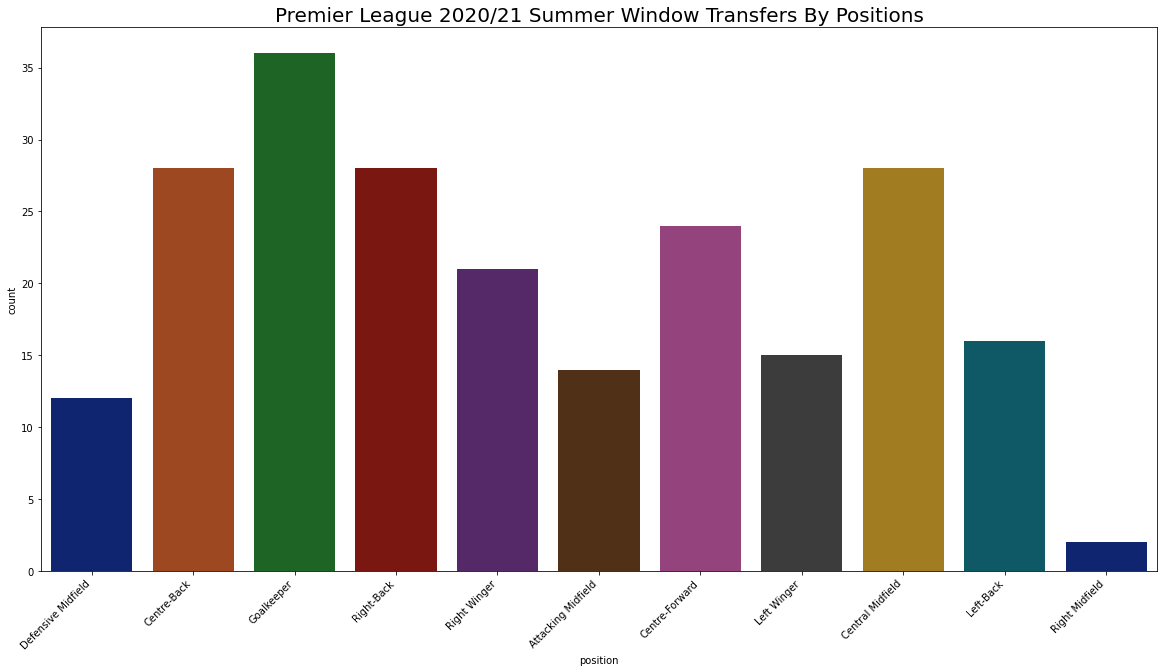

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x='position', data=df, palette=sns.color_palette('dark')).set_title('Premier League 2020/21 Summer Window Transfers By Positions', size=20)
plt.xticks(rotation=45,horizontalalignment='right')
plt.show()

#plt.savefig('transfer_positions.pdf', transparent=False)

### 2. What is the age distribution?

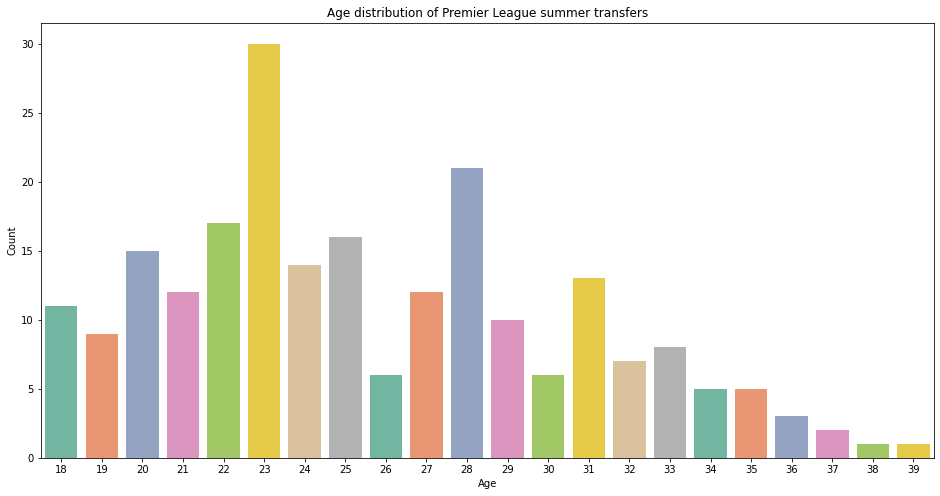

In [13]:
plt.figure(figsize=(16,8))
sns.countplot(x = 'age', data=df, palette=sns.color_palette('Set2'))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution of Premier League summer transfers')
plt.show()

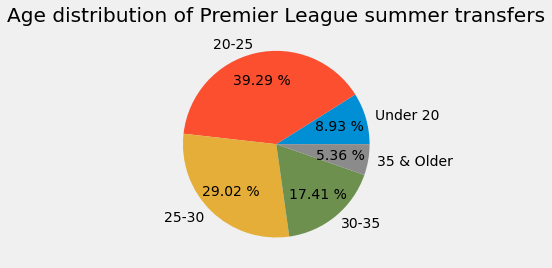

In [14]:
# I would also like to see a pie chart containing of players age groups 

plt.style.use('fivethirtyeight')

teens = df.loc[df.age < 20].count()[0]
medium1 = df.loc[(df.age >=20) & (df.age < 25)].count()[0]
medium2 = df.loc[(df.age >=25) & (df.age < 30)].count()[0]
after30 = df.loc[(df.age >= 30) & (df.age < 35)].count()[0]
late35 = df.loc[df.age >= 35].count()[0]

weights = [teens, medium1, medium2, after30,late35] 
labels = ['Under 20', "20-25", "25-30" , '30-35', '35 & Older']

plt.title('Age distribution of Premier League summer transfers')

plt.pie(weights, labels=labels, autopct = '%.2f %%', pctdistance = 0.7)

plt.show()

### 3. Who is the most pricy player from each of the group?

In [15]:
# lets create variables for each of the players who were the most expensive within their age group 
# I will have 2 requirements, first is that the players are only from the bought ones, and second is that there are no free transfers printed out
highest_teen = df.loc[(df.age < 20) & (df.transfer_movement == 'in') & (df.fee_cleaned >= 0.01)].sort_values('fee_cleaned', ascending=False).head(1)
highest_early_20s = df.loc[(df.age >= 20) & (df.age < 25) & (df.transfer_movement == 'in') & (df.fee_cleaned >= 0.01)].sort_values('fee_cleaned', ascending=False).head(1)
highest_late_20s = df.loc[(df.age >= 25) & (df.age < 30) & (df.transfer_movement == 'in') & (df.fee_cleaned >= 0.01)].sort_values('fee_cleaned', ascending=False).head(1)
highest_early_30s = df.loc[(df.age >=30) & (df.age < 35) & (df.transfer_movement == 'in') & (df.fee_cleaned >= 0.01)].sort_values('fee_cleaned', ascending=False).head(1)
highest_late_30s = df.loc[(df.age >= 35) & (df.transfer_movement == 'in') & (df.fee_cleaned >= 0.01)].sort_values('fee_cleaned', ascending=False).head(1)

In [16]:
# let's check the results if there are no mistakes
print(highest_teen)
print(highest_early_20s)
print(highest_late_20s)
print(highest_early_30s)
print(highest_late_30s)

                   club_name  player_name  age        position  \
468  Wolverhampton Wanderers  Fábio Silva   18  Centre-Forward   

               league_involved club_involved_name      fee transfer_movement  \
468  Portuguese Primeira Liga            FC Porto  £36.00m                in   

    transfer_period  fee_cleaned     league_name  year     season  
468          Summer         36.0  Premier League  2020  2020/2021  
     club_name  player_name  age            position    league_involved  \
92  Chelsea FC  Kai Havertz   21  Attacking Midfield  German Bundesliga   

   club_involved_name      fee transfer_movement transfer_period  fee_cleaned  \
92    Bay. Leverkusen  £72.00m                in          Summer         72.0   

       league_name  year     season  
92  Premier League  2020  2020/2021  
    club_name player_name  age            position  league_involved  \
0  Arsenal FC      Thomas   27  Defensive Midfield  Spanish La Liga   

  club_involved_name      fee transfe

In [17]:
# no players who are older than 35 years old and were bought not as a free transfer
# so now let's format those players into a proper text

print('The most expensive player under age of 20 is {player_name}, who has been bought from {club_involved_name} to \n{club_name} for {fee}\n'.format(
    player_name=highest_teen.iloc[0,1], club_involved_name=highest_teen.iloc[0,5],
    club_name=highest_teen.iloc[0,0], fee=highest_teen.iloc[0,6]))


print('The most expensive player in the age of 20 to 24 years is {player_name}, who has been bought from {club_involved_name} to {club_name} for {fee}\n'.format(
    player_name=highest_early_20s.iloc[0,1], club_involved_name=highest_early_20s.iloc[0,5],
    club_name=highest_early_20s.iloc[0,0], fee=highest_early_20s.iloc[0,6]))

print('The most expensive player under age of 25 to 29 years is {player_name}, who has been bought from {club_involved_name} to \n{club_name} for {fee}\n'.format(
    player_name=highest_late_20s.iloc[0,1], club_involved_name=highest_late_20s.iloc[0,5],
    club_name=highest_late_20s.iloc[0,0], fee=highest_late_20s.iloc[0,6]))

print('The most expensive player under age of 30 to 35 years is {player_name}, who has been bought from {club_involved_name} to \n{club_name} for {fee}'.format(
    player_name=highest_early_30s.iloc[0,1], club_involved_name=highest_early_30s.iloc[0,5],
    club_name=highest_early_30s.iloc[0,0], fee=highest_early_30s.iloc[0,6]))


The most expensive player under age of 20 is Fábio Silva, who has been bought from FC Porto to 
Wolverhampton Wanderers for £36.00m

The most expensive player in the age of 20 to 24 years is Kai Havertz, who has been bought from Bay. Leverkusen to Chelsea FC for £72.00m

The most expensive player under age of 25 to 29 years is Thomas, who has been bought from Atlético Madrid to 
Arsenal FC for £45.00m

The most expensive player under age of 30 to 35 years is Marçal, who has been bought from Olympique Lyon to 
Wolverhampton Wanderers for £1.80m


### 4. Compare number of players bought vs number of players sold

In [18]:
# first let's create seperate dataframes
sales = df[df['transfer_movement'] == 'out']
buys = df[df['transfer_movement'] == 'in']
print(sales.shape)
print(buys.shape)

(109, 13)
(115, 13)


In [22]:
#let's create data to work with it now and later
sales_data = sales.groupby('club_name')['fee_cleaned'].sum()
buys_data = buys.groupby('club_name')['fee_cleaned'].sum()

sale_num = sales.groupby('club_name')['fee'].count()
buy_num = buys.groupby('club_name')['fee'].count()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



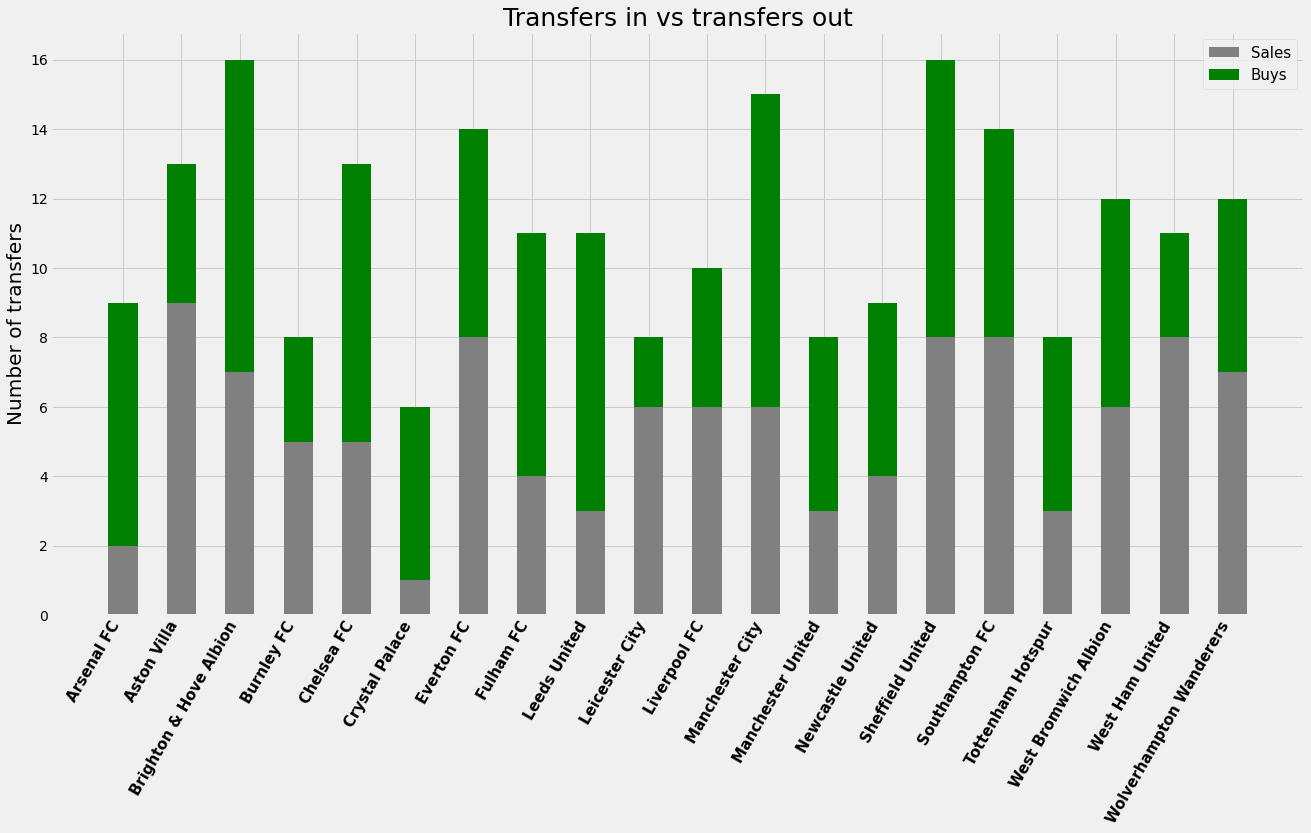

In [23]:
fig, ax = plt.subplots(figsize=(20,10))

x = df['club_name'].unique()


ax.bar(x,sale_num, width=0.5, color='grey', label='Sales')
ax.bar(x,buy_num, bottom = sale_num, width= 0.5, color='green', label='Buys')
ax.set_xticklabels(x, rotation=60, horizontalalignment='right', fontweight='heavy', fontsize=15)
ax.set_title('Transfers in vs transfers out', fontsize=25)
ax.set_ylabel('Number of transfers', fontsize=20)
ax.legend(fontsize=15)

plt.show()

### 5. Compare money spent on players bought vs money earned on players sold

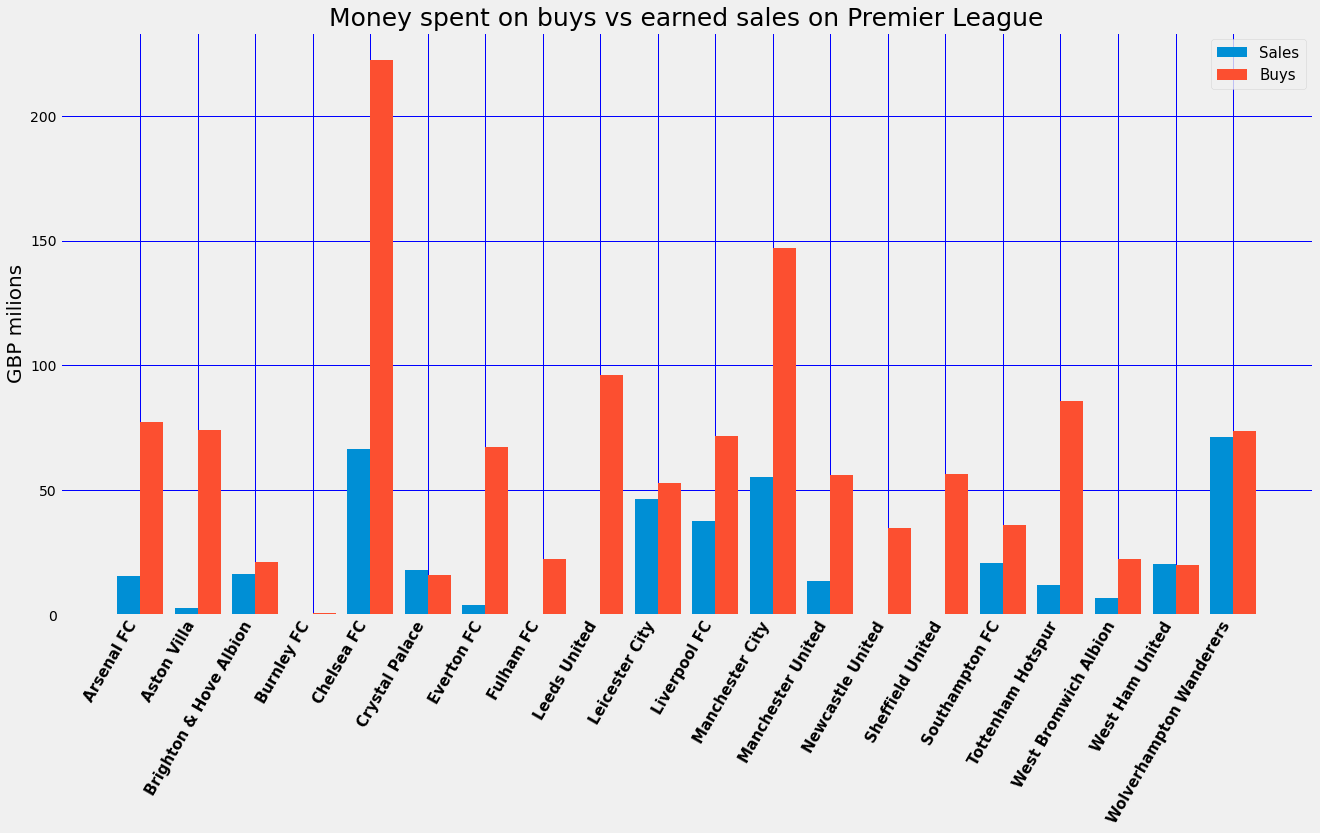

In [24]:
# comparison chart
fig, ax = plt.subplots(figsize=(20,10))

x = df['club_name'].unique()

a = sales_data
b = buys_data

width = 0.4
N = len(x)
loc = np.arange(N)


ax.bar(loc,a, width, bottom = 0, label='Sales')
ax.bar(loc+width, b, width, bottom = 0, label='Buys')

ax.set_title('Money spent on buys vs earned sales on Premier League', fontsize=25)
ax.legend(fontsize=15)
ax.grid(color='blue', linestyle='-', linewidth=1)
ax.set_xticks(loc + width / 2)
plt.xticks(rotation=60, horizontalalignment='right', fontweight='heavy', fontsize=15)
ax.set_xticklabels(x)
ax.set_ylabel('GBP milions', fontsize=20)
ax.autoscale_view()

#### extra - balance card

In [25]:
balance = sales_data - buys_data
balance.sort_values(ascending=True, inplace=True)
print(balance)

club_name
Chelsea FC                -155.880
Leeds United               -96.100
Manchester City            -91.480
Tottenham Hotspur          -73.890
Aston Villa                -71.350
Everton FC                 -63.403
Arsenal FC                 -61.740
Sheffield United           -56.440
Manchester United          -42.750
Newcastle United           -34.632
Liverpool FC               -34.020
Fulham FC                  -22.640
West Bromwich Albion       -15.480
Southampton FC             -15.480
Leicester City              -6.500
Brighton & Hove Albion      -4.590
Wolverhampton Wanderers     -2.340
Burnley FC                  -0.990
West Ham United              0.540
Crystal Palace               1.980
Name: fee_cleaned, dtype: float64


### 6 Analyze transfers by position - both sales and buys

In [26]:
# first I would like to know each position 

print(df['position'].unique())

['Defensive Midfield' 'Centre-Back' 'Goalkeeper' 'Right-Back'
 'Right Winger' 'Attacking Midfield' 'Centre-Forward' 'Left Winger'
 'Central Midfield' 'Left-Back' 'Right Midfield']


In [27]:
# now lets create variables for Sales

gks = sales[sales['position'] == 'Goalkeeper']
cbs = sales[sales['position'] == 'Centre-Back']
lbs = sales[sales['position'] == 'Left-Back']
rbs = sales[sales['position'] == 'Right-Back']
dms = sales[sales['position'] == 'Defensive Midfield']
rms = sales[sales['position'] == 'Right Midfield']
lms = sales[sales['position'] == 'Left Midfield']
cms = sales[sales['position'] == 'Central Midfield']
ams = sales[sales['position'] == 'Attacking Midfield']
fls = sales[sales['position'] == 'Left Winger']
rls = sales[sales['position'] == 'Right Winger']
cfs = sales[sales['position'] == 'Centre-Forward']

In [28]:
# and for Buys

gkb = buys[buys['position'] == 'Goalkeeper']
cbb = buys[buys['position'] == 'Centre-Back']
lbb = buys[buys['position'] == 'Left-Back']
rbb = buys[buys['position'] == 'Right-Back']
dmb = buys[buys['position'] == 'Defensive Midfield']
rmb = buys[buys['position'] == 'Right Midfield']
lmb = buys[buys['position'] == 'Left Midfield']
cmb = buys[buys['position'] == 'Central Midfield']
amb = buys[buys['position'] == 'Attacking Midfield']
flb = buys[buys['position'] == 'Left Winger']
rlb = buys[buys['position'] == 'Right Winger']
cfb = buys[buys['position'] == 'Centre-Forward']


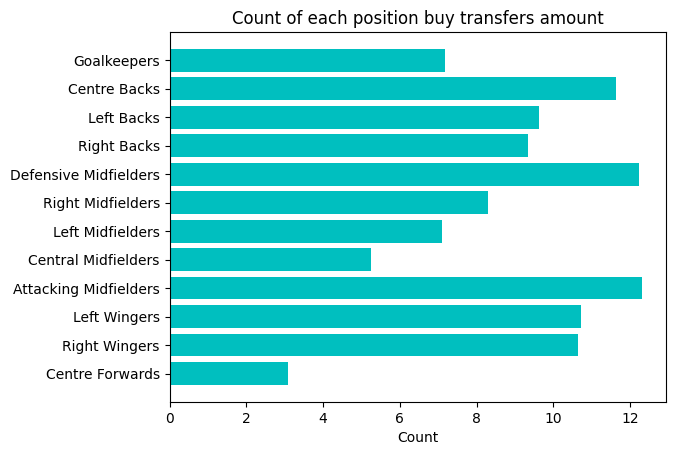

In [29]:
# Transfers IN chart

plt.rcdefaults()
fig, ax = plt.subplots()

c = (gkb, cbb, lbb, rbb, dmb, rmb, lmb, cmb, amb, flb, rlb, cfb)
labels = ('Goalkeepers', 'Centre Backs' , 'Left Backs', 'Right Backs', 'Defensive Midfielders', 'Right Midfielders',
          'Left Midfielders', 'Central Midfielders', 'Attacking Midfielders', 'Left Wingers','Right Wingers',
          'Centre Forwards')

y_pos = np.arange(len(c))
performance = 3 + 10 * np.random.rand(len(c))

ax.barh(y_pos, performance, align='center', color='c')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Count of each position buy transfers amount')

plt.show()

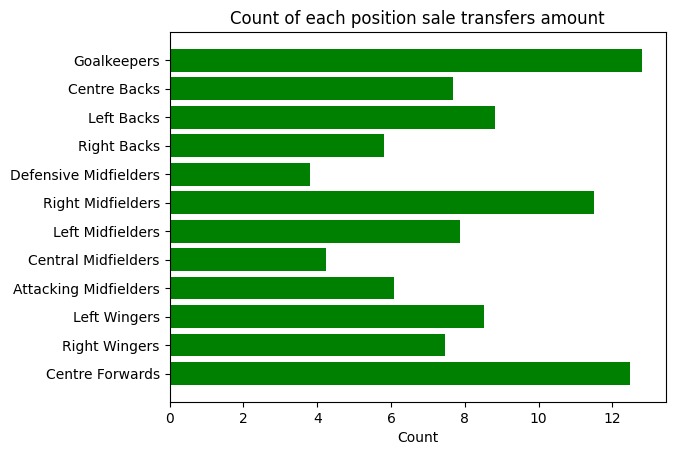

In [30]:
# Transfers Out chart

plt.rcdefaults()
fig, ax = plt.subplots()

d = (gks, cbs, lbs, rbs, dms, rms, lms, cms, ams, fls, rls, cfs)
labels = ('Goalkeepers', 'Centre Backs' , 'Left Backs', 'Right Backs', 'Defensive Midfielders', 'Right Midfielders',
          'Left Midfielders', 'Central Midfielders', 'Attacking Midfielders', 'Left Wingers','Right Wingers',
          'Centre Forwards')

y_pos = np.arange(len(d))
performance = 3 + 10 * np.random.rand(len(d))

ax.barh(y_pos, performance, align='center', color='g')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Count of each position sale transfers amount')

plt.show()

In [32]:
#let's check out our data
sales_data

club_name
Arsenal FC                 15.660
Aston Villa                 2.770
Brighton & Hove Albion     16.560
Burnley FC                  0.000
Chelsea FC                 66.600
Crystal Palace             18.000
Everton FC                  3.980
Fulham FC                   0.000
Leeds United                0.000
Leicester City             46.600
Liverpool FC               37.710
Manchester City            55.490
Manchester United          13.500
Newcastle United            0.248
Sheffield United            0.000
Southampton FC             20.790
Tottenham Hotspur          11.970
West Bromwich Albion        6.840
West Ham United            20.520
Wolverhampton Wanderers    71.280
Name: fee_cleaned, dtype: float64

In [33]:
# now I'm creating data to see number of transfers of each position for all of the clubs in the PL
positions_sales = sales[['club_name', 'position']].value_counts()
pd.set_option('display.max_rows', 85)

In [34]:
positions_sales.sort_index()

club_name                position          
Arsenal FC               Attacking Midfield    1
                         Goalkeeper            1
Aston Villa              Centre-Back           1
                         Centre-Forward        3
                         Goalkeeper            2
                         Left Winger           1
                         Right Winger          1
                         Right-Back            1
Brighton & Hove Albion   Central Midfield      3
                         Goalkeeper            1
                         Right Winger          1
                         Right-Back            2
Burnley FC               Central Midfield      2
                         Goalkeeper            2
                         Right Winger          1
Chelsea FC               Attacking Midfield    1
                         Central Midfield      1
                         Centre-Forward        1
                         Right Winger          2
Crystal Palace           

In [92]:
#the same card as above but including fee cleaned

sales_card = sales.groupby(['club_name','position', 'fee_cleaned'])['club_name'].count()
pd.set_option('display.max_rows', 103)

In [93]:
print(sales_card)

club_name                position            fee_cleaned
Arsenal FC               Attacking Midfield  0              1
                         Goalkeeper          16             1
Aston Villa              Centre-Back         0              1
                         Centre-Forward      0              2
                                             3              1
                         Goalkeeper          0              2
                         Left Winger         0              1
                         Right Winger        0              1
                         Right-Back          0              1
Brighton & Hove Albion   Central Midfield    0              1
                                             1              1
                                             4              1
                         Goalkeeper          1              1
                         Right Winger        11             1
                         Right-Back          0              2
Burnley FC   

In [85]:
# to samo co wyzej tylko dla zakupu

buys_new = buys.groupby(['club_name','position', 'fee_cleaned'])['club_name'].count()
buys_new.rename(columns=({'club_name': 'Team', 'position':'Position', 'fee_cleaned': 'Transfer fee (£)'}), inplace=True)
#buys_new = buys_new.rename(columns={'club_name': 'Team', 'position':'Position', 'fee_cleaned': 'Transfer fee (£)'})
pd.set_option('display.max_rows', 113)

TypeError: rename() got an unexpected keyword argument 'columns'

In [83]:
print(buys_new)

club_name                position            fee_cleaned
Arsenal FC               Attacking Midfield  0              1
                         Centre-Back         7              1
                                             23             1
                         Defensive Midfield  45             1
                         Goalkeeper          2              1
                         Right Winger        0              1
                         Right-Back          0              1
Aston Villa              Centre-Forward      28             1
                         Goalkeeper          16             1
                         Right Winger        17             1
                         Right-Back          14             1
Brighton & Hove Albion   Attacking Midfield  0              1
                         Central Midfield    0              2
                                             10             1
                         Centre-Back         1              1
             

In [43]:
result = buys_new.filter(like='West Ham United')

In [44]:
print(result)

club_name        position            fee_cleaned
West Ham United  Defensive Midfield  14.58          1
                 Right-Back          0.00           1
                                     5.40           1
Name: club_name, dtype: int64


### 7 Analyze which club bought the most number of players by positions - like defenders, midfielders etc

In [45]:
# first we need to combine all of the position into formations

defs = df[df['position'].isin(['Centre-Back', 'Left-Back', 'Right-Back'])]
mids = df[df['position'].isin(['Attacking Midfield', 'Left Midfield', 'Right Midfield', 'Defensive Midfield', 'Central Midfield'])]
frws = df[df['position'].isin(['Left Winger', 'Right Winger', 'Centre-Forward'])]
goalie = df[df['position'] == 'Goalkeeper']

In [48]:
#now I need to create variables needed for rest of the work
goal_in = goalie[goalie['transfer_movement'] == 'in']
def_in = defs[defs['transfer_movement'] == 'in']
mid_in = mids[mids['transfer_movement'] == 'in']
fwd_in = frws[frws['transfer_movement'] == 'in']

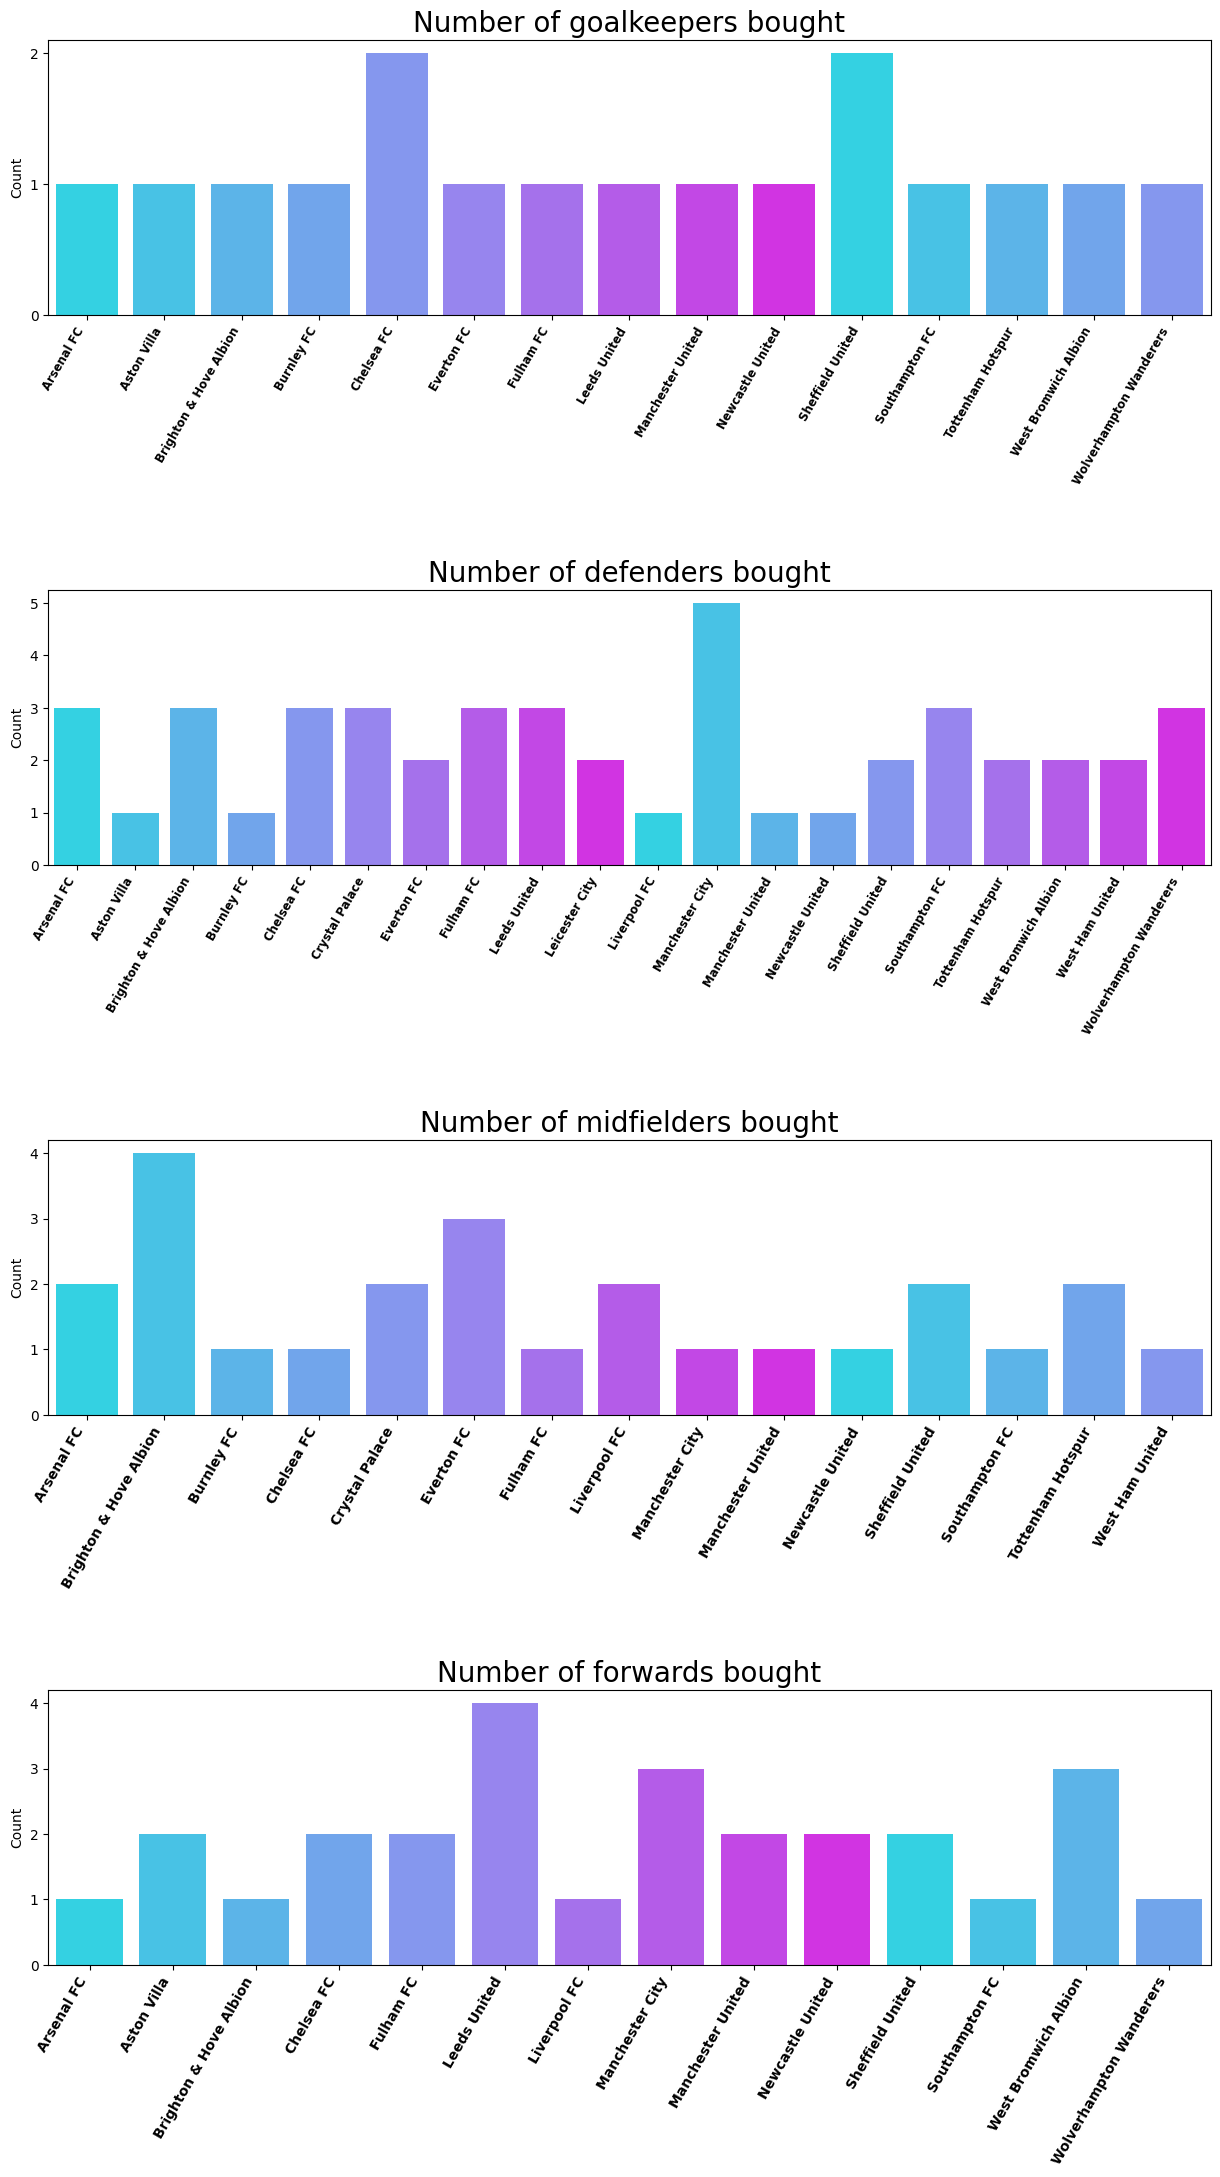

In [49]:
#let's plot it into 4 subplots - 1 plot per 1 field formation

fig,ax = plt.subplots(figsize=(15,25))

#setting different color for each of the plots

palette = sns.color_palette("cool", 10)

plt.subplot(4,1,1)
chart = sns.countplot(data=goal_in, x = 'club_name', palette=palette)
chart.set_xticklabels(chart.get_xticklabels(), 
                fontweight='bold', fontsize='small', rotation=60, horizontalalignment='right')
chart.yaxis.set_major_locator(MaxNLocator(integer=True))
chart.set(xlabel='')
chart.set(ylabel='Count')

plt.title('Number of goalkeepers bought', fontsize=20)

plt.subplot(4,1,2)
chart = sns.countplot(data=def_in, x = 'club_name', palette=palette)
chart.set_xticklabels(chart.get_xticklabels(), 
                fontweight='bold', fontsize='small', rotation=60, horizontalalignment='right')
chart.yaxis.set_major_locator(MaxNLocator(integer=True))

chart.set(xlabel='')
chart.set(ylabel='Count')

plt.title('Number of defenders bought', fontsize=20)

plt.subplot(4,1,3)
chart = sns.countplot(data=mid_in, x = 'club_name', palette=palette)

chart.set_xticklabels(chart.get_xticklabels(), 
                fontweight='bold', fontsize='medium', rotation=60, horizontalalignment='right')
chart.yaxis.set_major_locator(MaxNLocator(integer=True))

chart.set(xlabel='')
chart.set(ylabel='Count')

plt.title('Number of midfielders bought', fontsize=20)

plt.subplot(4,1,4)
chart = sns.countplot(data=fwd_in, x = 'club_name', palette=palette)
chart.set_xticklabels(chart.get_xticklabels(), 
                fontweight='bold', fontsize='medium', rotation=60, horizontalalignment='right')
chart.yaxis.set_major_locator(MaxNLocator(integer=True))


plt.subplots_adjust(hspace = 1)

chart.set(xlabel='')
chart.set(ylabel='Count')

plt.title('Number of forwards bought', fontsize=20)
plt.show()

In [50]:
#variables for sales

goal_out = goalie[goalie['transfer_movement'] == 'out']
def_out = defs[defs['transfer_movement'] == 'out']
mid_out = mids[mids['transfer_movement'] == 'out']
fwd_out = frws[frws['transfer_movement'] == 'out']

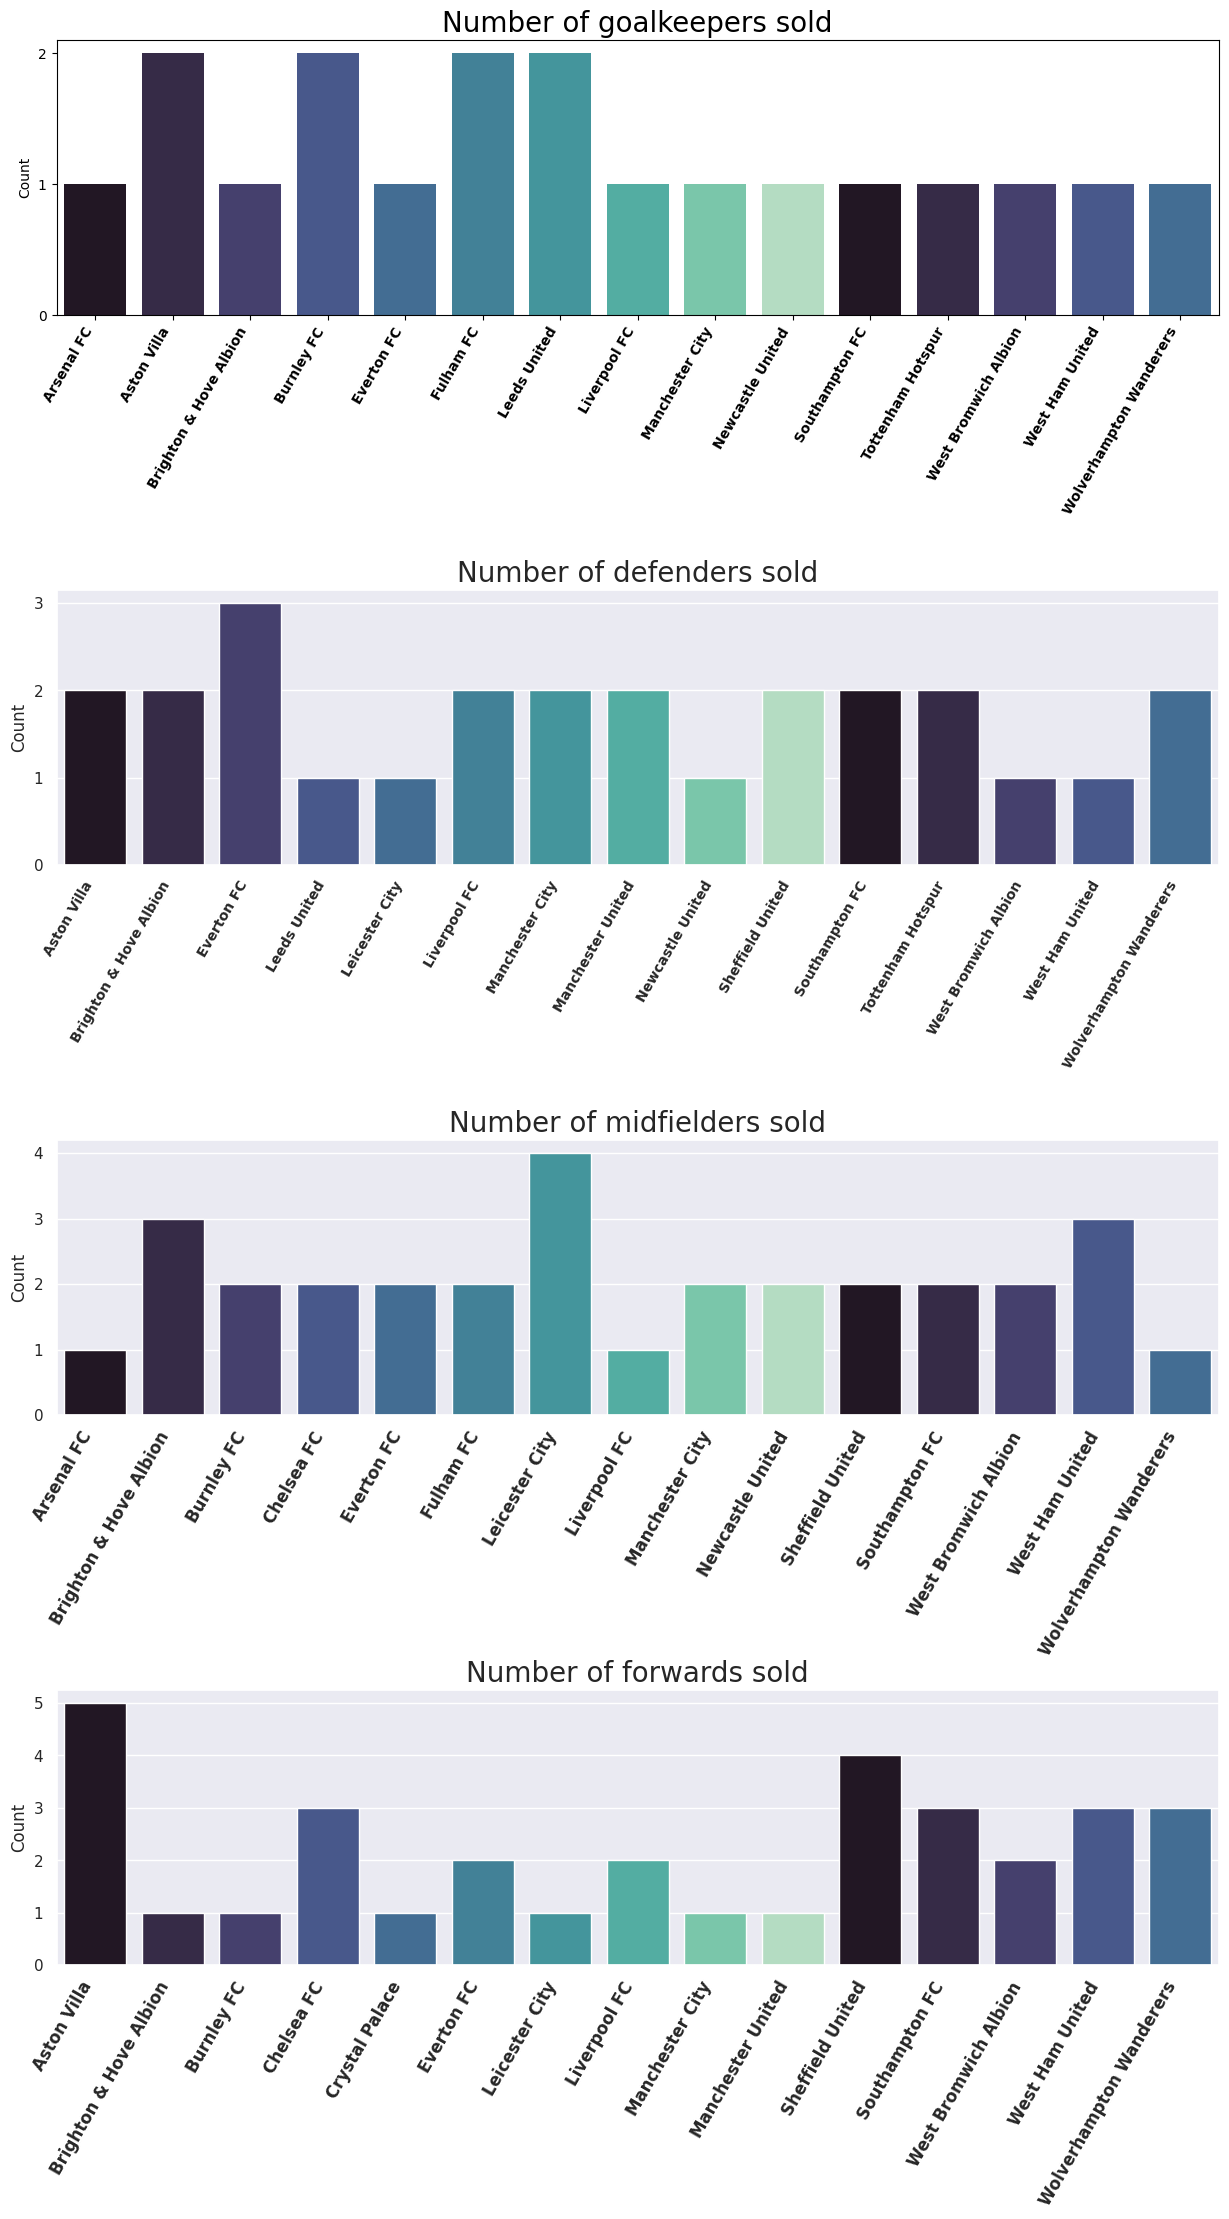

In [51]:
# and here we create 4 subplots for sale transfers

fig,ax = plt.subplots(figsize=(15,25))

palette_sell = sns.color_palette("mako", 10)

plt.subplot(4,1,1)
chart = sns.countplot(data=goal_out, x = 'club_name', palette=palette_sell)
sns.set_theme(style='darkgrid')

chart.set_xticklabels(chart.get_xticklabels(), 
                fontweight='bold', fontsize='small', rotation=60, horizontalalignment='right')
chart.yaxis.set_major_locator(MaxNLocator(integer=True))

chart.set(xlabel='')
chart.set(ylabel='Count')

plt.title('Number of goalkeepers sold', fontsize=20)

plt.subplot(4,1,2)
chart = sns.countplot(data=def_out, x = 'club_name', palette=palette_sell)
sns.set_theme(style='darkgrid')

chart.set_xticklabels(chart.get_xticklabels(), 
                fontweight='bold', fontsize='small', rotation=60, horizontalalignment='right')
chart.yaxis.set_major_locator(MaxNLocator(integer=True))
chart.set(xlabel='')
chart.set(ylabel='Count')

plt.title('Number of defenders sold', fontsize=20)

plt.subplot(4,1,3)
chart = sns.countplot(data=mid_out, x = 'club_name', palette=palette_sell)
sns.set_theme(style='darkgrid')

chart.set_xticklabels(chart.get_xticklabels(), 
                fontweight='bold', fontsize='medium', rotation=60, horizontalalignment='right')
chart.yaxis.set_major_locator(MaxNLocator(integer=True))
chart.set(xlabel='')
chart.set(ylabel='Count')

plt.title('Number of midfielders sold', fontsize=20)

plt.subplot(4,1,4)
chart = sns.countplot(data=fwd_out, x = 'club_name', palette=palette_sell)
sns.set_theme(style='darkgrid')

chart.set_xticklabels(chart.get_xticklabels(), 
                fontweight='bold', fontsize='medium', rotation=60, horizontalalignment='right')
chart.yaxis.set_major_locator(MaxNLocator(integer=True))
chart.set(xlabel='')
chart.set(ylabel='Count')


plt.subplots_adjust(hspace = 1)

plt.title('Number of forwards sold', fontsize=20)
plt.show()

### 9. Top 10 transfers in

In [52]:
top10buys = buys.groupby('club_name')[['player_name', 'fee_cleaned', 'club_involved_name']].first()
top10buys = top10buys.sort_values('fee_cleaned', ascending=False).head(10)
top10buys['fee_cleaned'] = 1000000 * top10buys['fee_cleaned']
top10buys = top10buys.reset_index()
top10buys = top10buys.rename(columns={'club_name': 'Team', 'player_name':'Player Name', 'fee_cleaned': 'Transfer fee (£)',
                                     'club_involved_name':'Selling Club'})

top10buys = top10buys.set_index('Team')
pd.options.display.float_format = '{:,.0f}'.format
top10buys

Player Name  Transfer fee (£)     Selling Club
Team                                                                         
Chelsea FC                     Kai Havertz        72,000,000  Bay. Leverkusen
Manchester City                 Rúben Dias        61,200,000          Benfica
Arsenal FC                          Thomas        45,000,000  Atlético Madrid
Liverpool FC                    Diogo Jota        40,230,000           Wolves
Wolverhampton Wanderers        Fábio Silva        36,000,000         FC Porto
Manchester United        Donny van de Beek        35,100,000             Ajax
Leicester City               Wesley Fofana        31,500,000    Saint-Étienne
Tottenham Hotspur         Giovani Lo Celso        28,800,000       Real Betis
Aston Villa                  Ollie Watkins        27,720,000        Brentford
Leeds United                       Rodrigo        27,000,000         Valencia

### 10. Top 10 transfers out

In [53]:
top10sales = sales.groupby('club_name')[['player_name', 'fee_cleaned', 'club_involved_name']].first()
top10sales = top10sales.sort_values('fee_cleaned', ascending=False).head(10)
top10sales['fee_cleaned'] = 1000000 * top10sales['fee_cleaned']
top10sales = top10sales.reset_index()
top10sales = top10sales.rename(columns={'club_name': 'Team', 'player_name':'Player Name', 'fee_cleaned': 'Transfer fee (£)',
                                     'club_involved_name':'Buying Club'})

top10buys = top10sales.set_index('Team')
pd.options.display.float_format = '{:,.0f}'.format
top10buys

Player Name  Transfer fee (£)  \
Team                                                               
Chelsea FC                       Álvaro Morata        50,400,000   
Leicester City                    Ben Chilwell        45,180,000   
Manchester City                     Leroy Sané        40,500,000   
Wolverhampton Wanderers             Diogo Jota        40,230,000   
Liverpool FC                    Rhian Brewster        23,400,000   
Crystal Palace               Alexander Sörloth        18,000,000   
Arsenal FC                   Emiliano Martínez        15,660,000   
Southampton FC           Pierre-Emile Höjbjerg        14,940,000   
Manchester United               Chris Smalling        13,500,000   
West Ham United                 Grady Diangana        12,150,000   

                             Buying Club  
Team                                      
Chelsea FC               Atlético Madrid  
Leicester City                   Chelsea  
Manchester City            Bayern Munich  
Wolverhampton Wanderers        Liverpool  
Liverpool FC                   Sheff Utd  
Crystal Palace                RB Leipzig  
Arsenal FC                   Aston Villa  
Southampton FC                     Spurs  
Manchester United                AS Roma  
West Ham United                West Brom

### 11. List of leagues which sold most players to the Premier League

In [54]:
# first thing fists - let's get rid of the players who were 'bought' from Development Teams or from other English Leagues
non_eng_buys = buys[~buys['league_involved'].isin(['English Premier League', 'English Championship', 
                                                'English League One', 'English League Two', 'Development Team',
                                                'Free Agent', 'Reserves'])]



In [78]:
#top 5 leagues from which players were bought to the Premier League
top_buy_leagues = non_eng_buys.groupby('league_involved')['league_involved'].count().sort_values(ascending=False)
print(top_buy_leagues.nlargest(5))

league_involved
French Ligue 1               13
Spanish La Liga               9
Dutch Eredivisie              4
German Bundesliga             4
Portuguese Primeira Liga      4
Name: league_involved, dtype: int64


In [56]:
# the same but for sales
non_eng_sales = sales[~sales['league_involved'].isin(['English Premier League', 'English Championship', 
                                                'English League One', 'English League Two', 'Development Team',
                                                'Free Agent', 'Reserves','Retired'])]

In [57]:
#top 5 leagues from which players were bought to the Premier League
top_sales_leagues = non_eng_sales.groupby('league_involved')['league_involved'].count().sort_values(ascending=False)
print(top_sales_leagues.nlargest(5))

league_involved
Spanish La Liga      8
Italian Serie A      7
Dutch Eredivisie     3
Turkish Super Lig    2
French Ligue 1       2
Name: league_involved, dtype: int64


In [58]:
# lets check if the players sold outside England are older then the ones which were bought

print('The mean age of players bought to EPL is {b_age_mean}'.format(b_age_mean=non_eng_buys['age'].mean().astype(float).round(2)))
print('The mean age of players sold from EPL is {s_age_mean}'.format(s_age_mean=non_eng_sales['age'].mean().astype(float).round(2)))


The mean age of players bought to EPL is 24.23
The mean age of players sold from EPL is 28.19


### 12. List of clubs which sold most of their players to the Premier League during summer transfer window

In [59]:
# Because there are only couple of clubs which sold more than 2 players I decided to filter by criterion

top_sale_clubs = non_eng_sales.groupby('club_involved_name')['club_involved_name'].count().sort_values(ascending=False)
two_sale_clubs = top_sale_clubs.where(top_sale_clubs >= 2)
two_sale_clubs.dropna(inplace=True)
print(two_sale_clubs)

club_involved_name
AS Roma      3
Sampdoria    2
Real Betis   2
Benfica      2
Name: club_involved_name, dtype: float64


### 13. Analyze buy transfers from other English leagues & Dev Teams & Reserve Teams

In [60]:
# Let's now check transfers in England - first players bought to the EPL

eng_buy = buys[buys['league_involved'].isin(['English Premier League', 'English Championship', 
                                                'English League One', 'English League Two', 'Development Team'
                                                , 'Reserves'])]

# print the data to check if it correct
eng_buy.head(10)

club_name        player_name  age            position  \
4               Arsenal FC      Cédric Soares   28          Right-Back   
5               Arsenal FC            Willian   32        Right Winger   
6               Arsenal FC   Emile Smith Rowe   20  Attacking Midfield   
19             Aston Villa      Ollie Watkins   24      Centre-Forward   
21             Aston Villa  Emiliano Martínez   28          Goalkeeper   
22             Aston Villa         Matty Cash   23          Right-Back   
44  Brighton & Hove Albion       Adam Lallana   32  Attacking Midfield   
50  Brighton & Hove Albion     Robert Sánchez   22          Goalkeeper   
51  Brighton & Hove Albion        Max Sanders   21    Central Midfield   
52  Brighton & Hove Albion     Jayson Molumby   20    Central Midfield   

           league_involved club_involved_name            fee  \
4   English Premier League        Southampton  Free transfer   
5   English Premier League            Chelsea  Free transfer   
6         Development Team        Arsenal U23              -   
19    English Championship          Brentford        £27.72m   
21  English Premier League            Arsenal        £15.66m   
22    English Championship       Nottm Forest        £14.18m   
44  English Premier League          Liverpool  Free transfer   
50        Development Team       Brighton U23              -   
51        Development Team       Brighton U23              -   
52        Development Team       Brighton U23              -   

   transfer_movement transfer_period  fee_cleaned     league_name  year  \
4                 in          Summer            0  Premier League  2020   
5                 in          Summer            0  Premier League  2020   
6                 in          Summer            0  Premier League  2020   
19                in          Summer           28  Premier League  2020   
21                in          Summer           16  Premier League  2020   
22                in          Summer           14  Premier League  2020   
44                in          Summer            0  Premier League  2020   
50                in          Summer            0  Premier League  2020   
51                in          Summer            0  Premier League  2020   
52                in          Summer            0  Premier League  2020   

       season  
4   2020/2021  
5   2020/2021  
6   2020/2021  
19  2020/2021  
21  2020/2021  
22  2020/2021  
44  2020/2021  
50  2020/2021  
51  2020/2021  
52  2020/2021

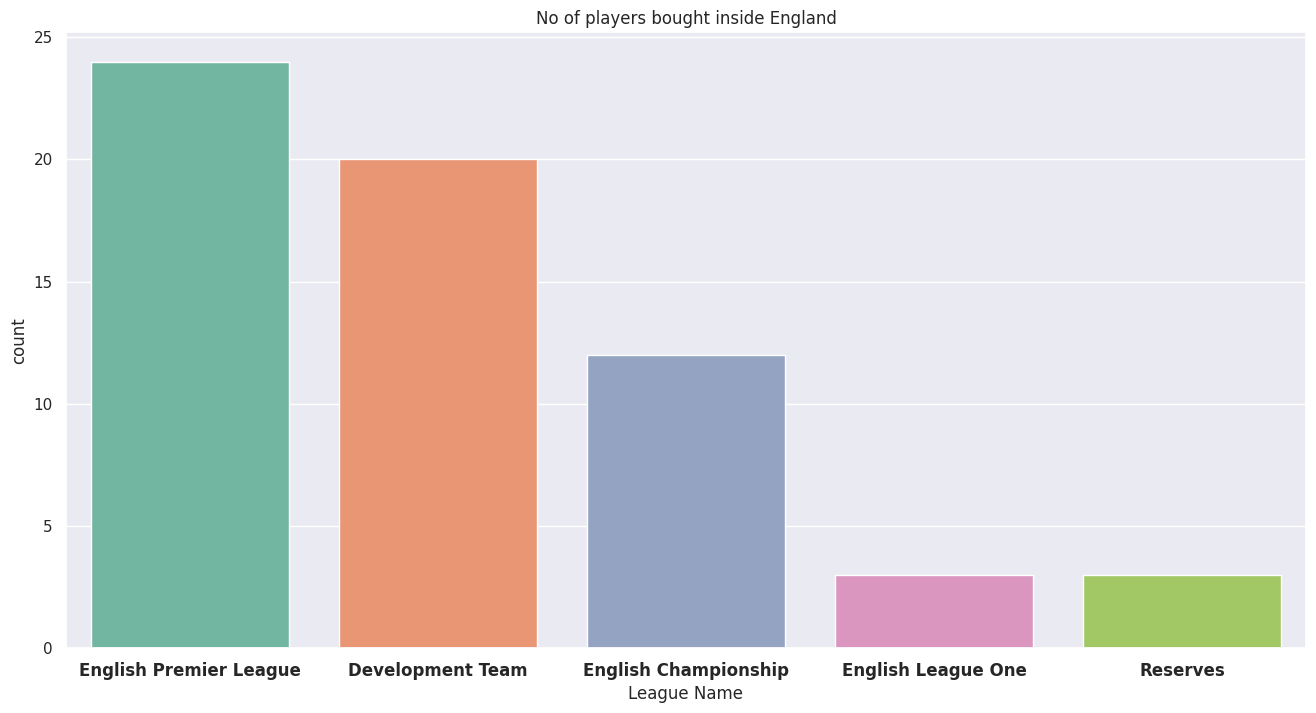

In [61]:
# Simple visualization of the data

plt.figure(figsize=(16,8))
chart = sns.countplot(data=eng_buy, x = 'league_involved', palette='Set2')
sns.set_theme(style='darkgrid')

chart.set_xticklabels(chart.get_xticklabels(), 
                fontweight='bold', fontsize='medium')

chart.set(xlabel='League Name')

plt.title('No of players bought inside England')
plt.show()

In [62]:
# Now sales data

eng_sell = sales[sales['league_involved'].isin(['English Premier League', 'English Championship', 
                                                'English League One', 'English League Two', 'Development Team'
                                                , 'Reserves'])]


eng_sell.head(10)

club_name        player_name  age          position  \
11              Arsenal FC  Emiliano Martínez   28        Goalkeeper   
27             Aston Villa      Matija Sarkic   23        Goalkeeper   
29             Aston Villa      James Chester   31       Centre-Back   
31             Aston Villa         James Bree   22        Right-Back   
33             Aston Villa        Scott Hogan   28    Centre-Forward   
63  Brighton & Hove Albion  Anthony Knockaert   28      Right Winger   
66  Brighton & Hove Albion      Dale Stephens   31  Central Midfield   
67  Brighton & Hove Albion       David Button   31        Goalkeeper   
86              Burnley FC      Jeff Hendrick   28  Central Midfield   
87              Burnley FC           Joe Hart   33        Goalkeeper   

           league_involved club_involved_name            fee  \
11  English Premier League        Aston Villa        £15.66m   
27  English Premier League             Wolves  Free transfer   
29    English Championship         Stoke City  Free transfer   
31    English Championship              Luton              ?   
33    English Championship         Birmingham         £2.77m   
63  English Premier League             Fulham        £10.53m   
66  English Premier League            Burnley        £990Th.   
67  English Premier League          West Brom        £990Th.   
86  English Premier League          Newcastle  Free transfer   
87  English Premier League              Spurs  Free transfer   

   transfer_movement transfer_period  fee_cleaned     league_name  year  \
11               out          Summer           16  Premier League  2020   
27               out          Summer            0  Premier League  2020   
29               out          Summer            0  Premier League  2020   
31               out          Summer            0  Premier League  2020   
33               out          Summer            3  Premier League  2020   
63               out          Summer           11  Premier League  2020   
66               out          Summer            1  Premier League  2020   
67               out          Summer            1  Premier League  2020   
86               out          Summer            0  Premier League  2020   
87               out          Summer            0  Premier League  2020   

       season  
11  2020/2021  
27  2020/2021  
29  2020/2021  
31  2020/2021  
33  2020/2021  
63  2020/2021  
66  2020/2021  
67  2020/2021  
86  2020/2021  
87  2020/2021

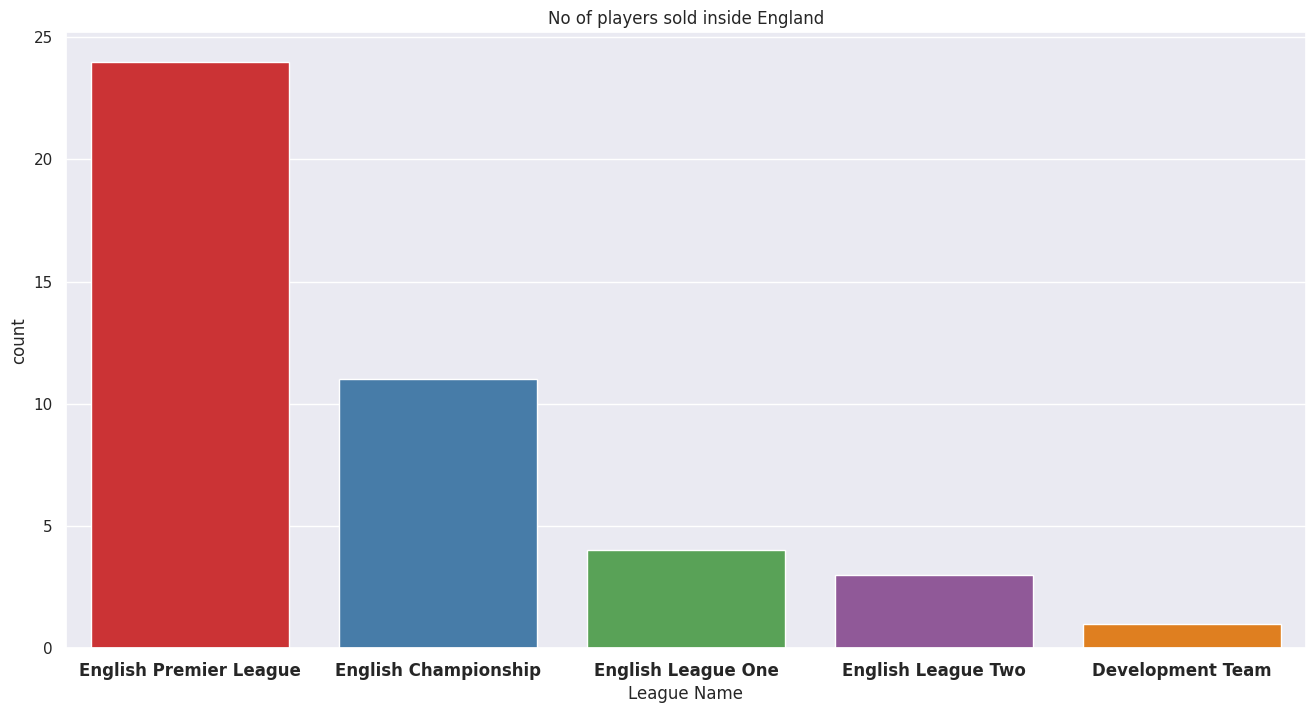

In [63]:
# and again simple visualization of sales data

plt.figure(figsize=(16,8))
chart = sns.countplot(data=eng_sell, x = 'league_involved', palette='Set1')
sns.set_theme(style='darkgrid')

chart.set_xticklabels(chart.get_xticklabels(), 
                fontweight='bold', fontsize='medium')

chart.set(xlabel='League Name')

plt.title('No of players sold inside England')
plt.show()

### 14. List of highest buy transfers for each club

In [64]:
#as usual let's create variable to work with it

highest_buys= buys.groupby('club_name')[['player_name', 'fee_cleaned']].first()
highest_buys['fee_cleaned'] = 1000000 * highest_buys['fee_cleaned']
highest_buys = highest_buys.reset_index()
highest_buys = highest_buys.rename(columns={'club_name': 'Team', 'player_name':'Player Name', 'fee_cleaned': 'Transfer fee (£)'})

highest_buys = highest_buys.set_index('Team')
pd.options.display.float_format = '{:,.0f}'.format
highest_buys

Player Name  Transfer fee (£)
Team                                                        
Arsenal FC                          Thomas        45,000,000
Aston Villa                  Ollie Watkins        27,720,000
Brighton & Hove Albion         Jakub Moder         9,900,000
Burnley FC                   Dale Stephens           990,000
Chelsea FC                     Kai Havertz        72,000,000
Crystal Palace                Eberechi Eze        16,020,000
Everton FC                     Ben Godfrey        24,750,000
Fulham FC                Anthony Knockaert        10,530,000
Leeds United                       Rodrigo        27,000,000
Leicester City               Wesley Fofana        31,500,000
Liverpool FC                    Diogo Jota        40,230,000
Manchester City                 Rúben Dias        61,200,000
Manchester United        Donny van de Beek        35,100,000
Newcastle United             Callum Wilson        20,030,000
Sheffield United            Rhian Brewster        23,400,000
Southampton FC             Ibrahima Diallo        13,500,000
Tottenham Hotspur         Giovani Lo Celso        28,800,000
West Bromwich Albion        Grady Diangana        12,150,000
West Ham United               Tomas Soucek        14,580,000
Wolverhampton Wanderers        Fábio Silva        36,000,000

### 15. List of highest sale transfers for each club

In [65]:
highest_sales= sales.groupby('club_name')[['player_name', 'fee_cleaned']].first()
highest_sales['fee_cleaned'] = 1000000 * highest_sales['fee_cleaned']
highest_sales = highest_sales.reset_index()
highest_sales = highest_sales.rename(columns={'club_name': 'Team','player_name':'Player Name', 'fee_cleaned': 'Transfer fee (£)'}, )

highest_sales = highest_sales.set_index('Team')

pd.options.display.float_format = '{:,.0f}'.format
highest_sales

Player Name  Transfer fee (£)
Team                                                             
Arsenal FC                    Emiliano Martínez        15,660,000
Aston Villa              Rushian Hepburn-Murphy                 0
Brighton & Hove Albion        Anthony Knockaert        10,530,000
Burnley FC                        Jeff Hendrick                 0
Chelsea FC                        Álvaro Morata        50,400,000
Crystal Palace                Alexander Sörloth        18,000,000
Everton FC                  Morgan Schneiderlin         2,000,000
Fulham FC                      Luca de la Torre                 0
Leeds United                        Will Huffer                 0
Leicester City                     Ben Chilwell        45,180,000
Liverpool FC                     Rhian Brewster        23,400,000
Manchester City                      Leroy Sané        40,500,000
Manchester United                Chris Smalling        13,500,000
Newcastle United                   Dan Barlaser           248,000
Sheffield United                 Ravel Morrison                 0
Southampton FC            Pierre-Emile Höjbjerg        14,940,000
Tottenham Hotspur            Kyle Walker-Peters        11,970,000
West Bromwich Albion               Oliver Burke         5,850,000
West Ham United                  Grady Diangana        12,150,000
Wolverhampton Wanderers              Diogo Jota        40,230,000